# College Admissions Predicator
Keyword: linear regression, machine learning

# TASK #1: UNDERSTAND THE PROBLEM STATEMENT

# Description

In this project, we will train regression models to find the probability of college admissions university. In this project we will go through the following tasks: 
(1) Understand the Problem Statement
(2) Import libraries and datasets 
(3) Perform Exploratory Data Analysis
(4) Perform Data Visualization
(5) Create Training and Testing Datasets
(6) Train and Evaluate a Linear Regression Model
(7) Train and Evaluate an Artificial Neural Network Model
(8) Train and Evaluate a Random Forest Regressor and Decision Tree Model

# Source
https://www.kaggle.com/sumithbhongale/american-university-data-ipeds-dataset

# Objective

Apply Python libraries to import and visualize dataset.

Perform exploratory data analysis

Understand the distribution and relationship of data

Split and Standardize training and testing dataset

Train various regression models using Scikit-Learn

Train Artificial Neural Network models to perform regression tasks

Evaluate, compare and analyze the performance of different regression models

# TASK #2: IMPORT LIBRARIES AND DATASET

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create Excel filepath
data = pd.read_csv("resources/Admission_Predict.csv")
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
#List all column names in dataset
for col in data.columns:
    print (col)

Serial No.
GRE Score
TOEFL Score
University Rating
SOP
LOR 
CGPA
Research
Chance of Admit 


In [5]:
data.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [6]:
#Statistical summary of the dataframe
data.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.00000
mean,600.500000,316.807500,107.41000,3.087500,3.400000,3.452500,8.598925,0.547500,0.72435
std,346.554469,11.464073,6.06445,1.142774,1.006029,0.897728,0.595820,0.497946,0.14249
min,1.000000,290.000000,92.00000,1.000000,1.000000,1.000000,6.800000,0.000000,0.34000
25%,300.750000,308.000000,103.00000,2.000000,2.500000,3.000000,8.170000,0.000000,0.64000
50%,600.500000,317.000000,107.00000,3.000000,3.500000,3.500000,8.610000,1.000000,0.73000
75%,900.250000,325.000000,112.00000,4.000000,4.000000,4.000000,9.062500,1.000000,0.83000
max,1200.000000,340.000000,120.00000,5.000000,5.000000,5.000000,9.920000,1.000000,0.97000


# TASKS #3 Perform Exploratory Data Analysis

# Trimming The Data
Since we have so many attributes and not all are relevant we need to select the ones we want to use. We can do this by typing the following.

In [7]:
admissions = data.drop(columns = ['Serial No.', 'SOP', 'LOR ' ])

admissions =admissions.dropna()
admissions.head()

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
0,337,118,4,9.65,1,0.92
1,324,107,4,8.87,1,0.76
2,316,104,3,8.00,1,0.72
3,322,110,3,8.67,1,0.80
4,314,103,2,8.21,0,0.65


In [8]:
#List all column names in dataset
for col in admissions.columns:
    print (col)

GRE Score
TOEFL Score
University Rating
CGPA
Research
Chance of Admit 


In [9]:
admissions.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

# TASK #4: PERFORM DATA VISUALIZATION

,GRE Score,TOEFL Score,University Rating,CGPA,Research,Chance of Admit
count,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.00000
mean,316.807500,107.41000,3.087500,8.598925,0.547500,0.72435
std,11.464073,6.06445,1.142774,0.595820,0.497946,0.14249
min,290.000000,92.00000,1.000000,6.800000,0.000000,0.34000
25%,308.000000,103.00000,2.000000,8.170000,0.000000,0.64000
50%,317.000000,107.00000,3.000000,8.610000,1.000000,0.73000
75%,325.000000,112.00000,4.000000,9.062500,1.000000,0.83000
max,340.000000,120.00000,5.000000,9.920000,1.000000,0.97000


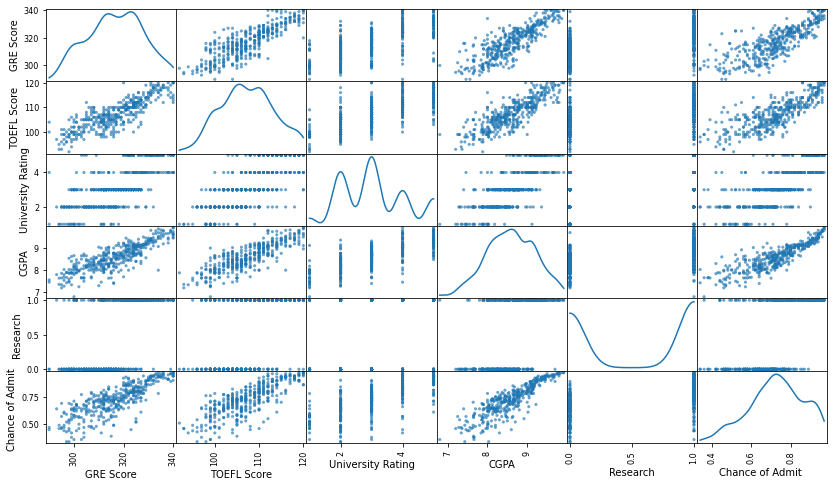

In [11]:
# Produce a scatter matrix for several sample pairs of features in the data
sample_cols = ['GRE Score','TOEFL Score','University Rating','CGPA','Research','Chance of Admit ']
display(admissions[sample_cols].describe())

pd.plotting.scatter_matrix(admissions[sample_cols], alpha = 0.3, figsize = (14,8), diagonal = 'kde');

array([[<AxesSubplot:title={'center':'GRE Score'}>,
        <AxesSubplot:title={'center':'TOEFL Score'}>],
       [<AxesSubplot:title={'center':'University Rating'}>,
        <AxesSubplot:title={'center':'CGPA'}>],
       [<AxesSubplot:title={'center':'Research'}>,
        <AxesSubplot:title={'center':'Chance of Admit '}>]], dtype=object)

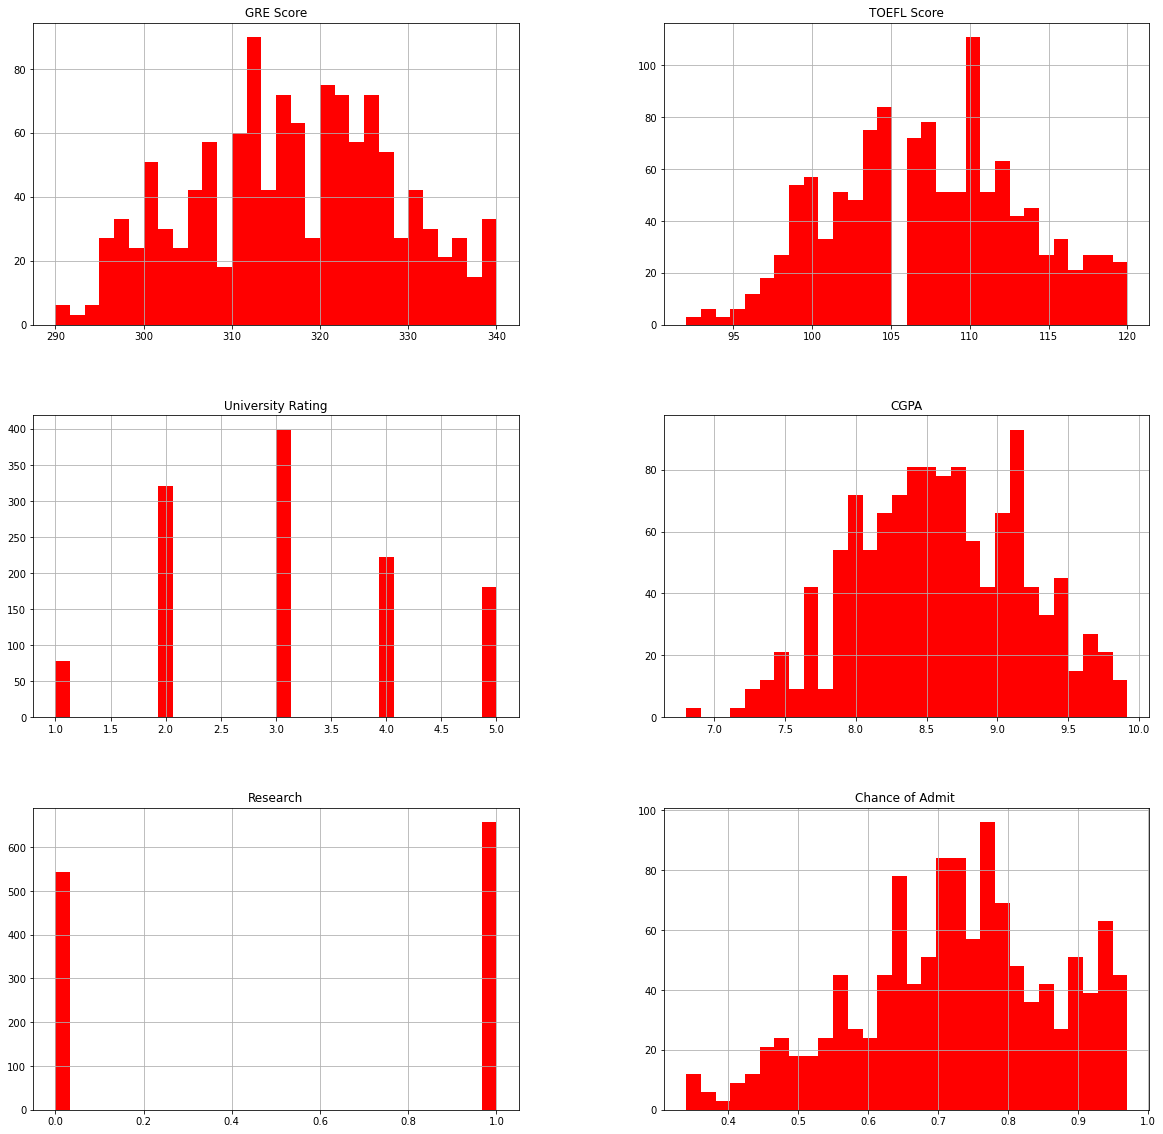

In [12]:
admissions.hist(bins = 30, figsize = (20, 20), color = 'r')

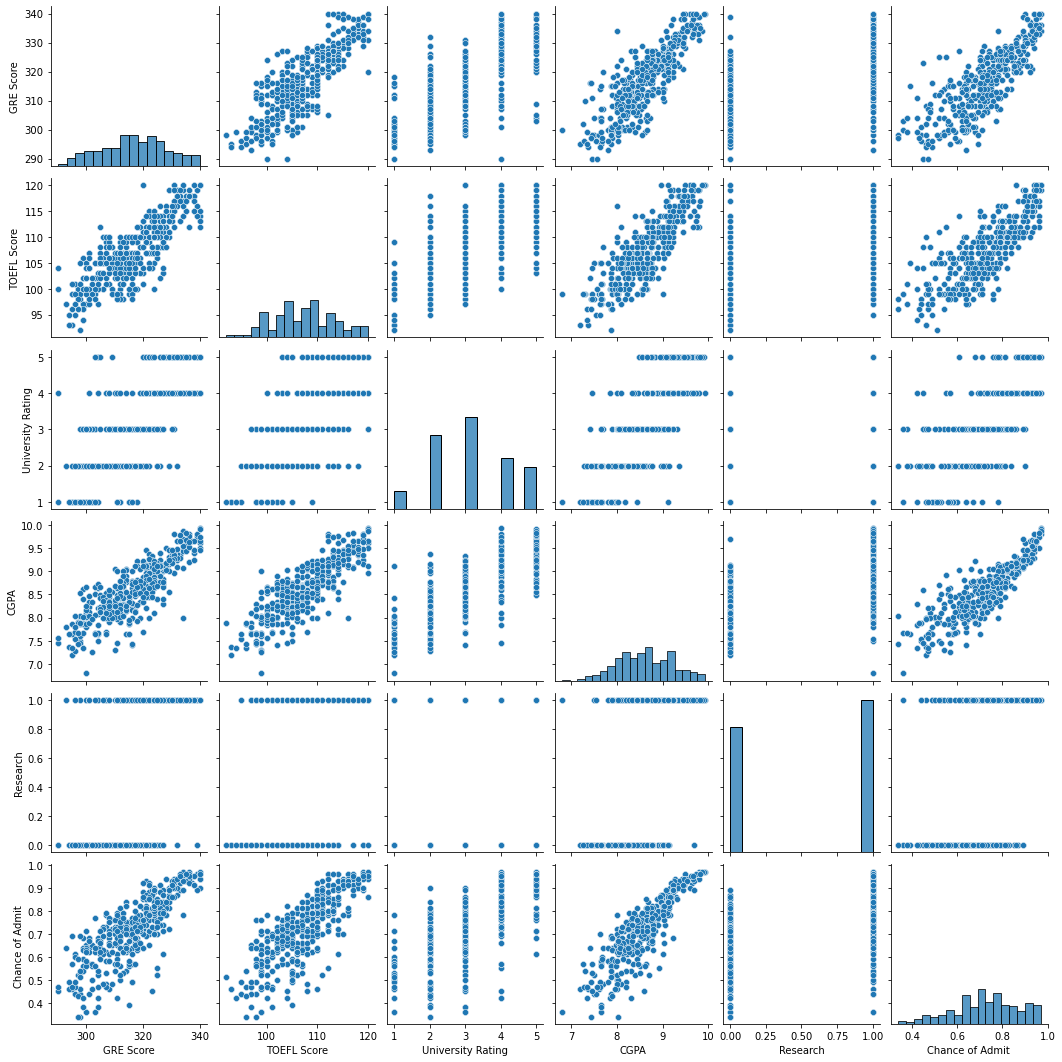

In [13]:
sns.pairplot(admissions)

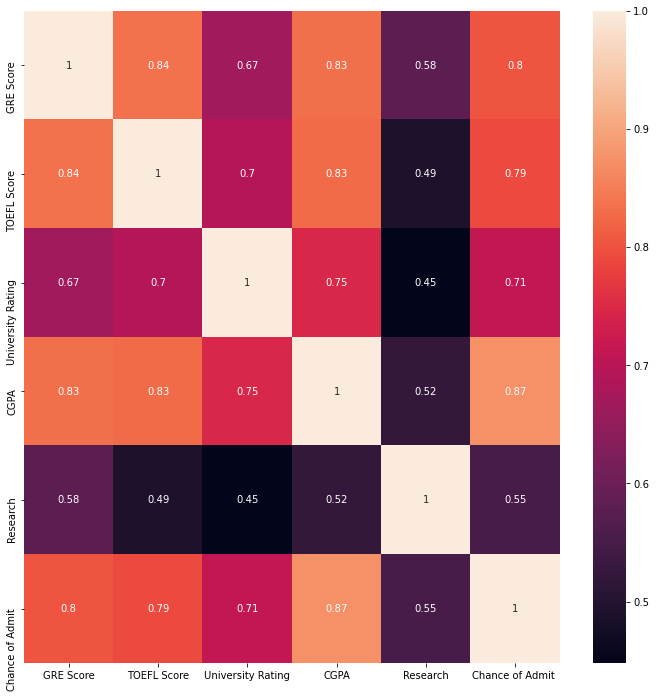

In [14]:
corr_matrix = admissions.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr_matrix, annot = True)
plt.show()

# Task #5: Create Training and Testing Datasets

# Separating The Data
Now that the dataset has been trimmed,we need to separate it into 4 arrays. However, before we can do that we need to define what attribute we are trying to predict. This attribute is known as a label. The other attributes that will determine our label are known as features. Once we've done this we will use numpy to create two arrays. One that contains all of our features and one that contains our labels.

In [15]:
X = np.array(admissions.drop(["Chance of Admit "], 1)) # Features
y = np.array(admissions["Chance of Admit "].values.reshape(-1, 1)) # Labels

print("Size of the X: ", X.shape)
print("Size of the y: ", y.shape)

Size of the X:  (1200, 5)
Size of the y:  (1200, 1)


In [18]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_x = StandardScaler()
X = scaler_x.fit_transform(X)
y = scaler_x.fit_transform(y)

In [20]:
# Split the data into training and testing

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15)


# Task #6: Train and Evaluate a Linear Regression Model (Implementing the Algorithm)
Now that we understand how linear regression works we can use it to make predictions

We will start by defining the model which we will be using.

In [21]:
# Create a LinearRegression model and fit it to the scaled training data

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score


In [22]:
#Next we will train and score our model using the arrays we created in the previous tutorial.

LinearRegressionModel = LinearRegression()
LinearRegressionModel.fit(X_train, y_train)
acc = LinearRegressionModel.score(X_test, y_test) # acc stands for accuracy 

In [23]:
#To see how well our algorithm performed on our test data we can print out the accuracy.

print(acc)

0.8569422629973718


# Viewing The Constants
If we want to see the constants used to generate the line we can type the following.

In [24]:
print('Coefficient: \n', LinearRegressionModel.coef_) # These are each slope value
print('Intercept: \n', LinearRegressionModel.intercept_) # This is the intercept

Coefficient: 
 [[0.13381373 0.12114738 0.08258277 0.54367868 0.09665858]]
Intercept: 
 [-0.00183173]


# Task #7:Train and Evaluate an Artifical Neural Network

In [ ]:
!pip install tensorflow 
!pip install keras 

In [25]:
import os
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Dense, Activation, Dropout

In [31]:
ANN = keras.Sequential()
ANN.add(Dense(50, input_dim = 5))
ANN.add(Activation('relu'))

ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(150))
ANN.add(Activation('relu'))
ANN.add(Dropout(0.5))

ANN.add(Dense(150))
ANN.add(Activation('linear'))
ANN.add(Dropout(1))

ANN.compile(loss = 'mse', optimizer = 'adam')
ANN.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 50)                300       
_________________________________________________________________
activation_4 (Activation)    (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 150)               7650      
_________________________________________________________________
activation_5 (Activation)    (None, 150)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 150)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 150)               22650     
_________________________________________________________________
activation_6 (Activation)    (None, 150)              

In [32]:
ANN.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [33]:
X_train[0]

array([-0.24499762,  0.42725722, -0.07660001,  0.33761705, -1.09997489])

In [34]:
y_train[0]

array([0.18008725])

In [35]:
epochs_hist = ANN.fit(X_train, y_train, epochs = 100, batch_size = 50)

Epoch 1/100


ValueError: in user code:

    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:805 train_function  *
        return step_function(self, iterator)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:795 step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:1259 run
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2730 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:3417 _call_for_each_replica
        return fn(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:788 run_step  **
        outputs = model.train_step(data)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:754 train_step
        y_pred = self(x, training=True)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\sequential.py:375 call
        return super(Sequential, self).call(inputs, training=training, mask=mask)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:424 call
        return self._run_internal_graph(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\functional.py:560 _run_internal_graph
        outputs = node.layer(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\engine\base_layer.py:1012 __call__
        outputs = call_fn(inputs, *args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:230 call
        output = control_flow_util.smart_cond(training, dropped_inputs,
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\utils\control_flow_util.py:114 smart_cond
        return smart_module.smart_cond(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\framework\smart_cond.py:54 smart_cond
        return true_fn()
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\keras\layers\core.py:224 dropped_inputs
        return nn.dropout(
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\deprecation.py:538 new_func
        return func(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:5059 dropout
        return dropout_v2(x, rate, noise_shape=noise_shape, seed=seed, name=name)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\util\dispatch.py:201 wrapper
        return target(*args, **kwargs)
    C:\Users\monic\Anaconda3\lib\site-packages\tensorflow\python\ops\nn_ops.py:5139 dropout_v2
        raise ValueError("rate must be a scalar tensor or a float in the "

    ValueError: rate must be a scalar tensor or a float in the range [0, 1), got 1


In [ ]:
result = ANN.evaluate(X_train, y_train, epochs = 100, batch_size = 20)
accuracy_ANN = 1 - result

In [ ]:
print("Accuracy : {}".format(accuracy_ANN))

In [ ]:
epochs_hist.history.keys()

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.title("Model Loss Progress During Training")
plt.xlable('Epoch')
plt.ylabel("Training Loss")
plt.legend(['Training Loss'])